# Faiss 向量检索库入门教程

## 1. Faiss简介

Faiss (Facebook AI相似性搜索) 是由Facebook AI Research开发的一个高效向量相似度搜索和聚类的库。它专为处理大规模高维向量数据而设计，能够在数十亿级向量集合中快速找到最近邻。

Faiss的主要特点：
- 针对高维向量的高效相似度搜索
- 支持多种索引类型，适应不同场景需求
- 强大的性能，远超传统暴力搜索方法
- 支持GPU加速
- C++实现，提供Python绑定

In [ ]:
# 配置 matplotlib 中文字体显示
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import warnings

def configure_chinese_font():
    """配置 matplotlib 中文字体显示"""
    system = platform.system()
    
    if system == "Darwin":  # macOS
        # 尝试常见的 macOS 中文字体
        fonts = [
            'Heiti TC',      # 黑体-繁
            'Heiti SC',      # 黑体-简
            'STHeiti',       # 华文黑体
            'Arial Unicode MS',  # Arial Unicode
            'SimHei',        # 黑体
            'DejaVu Sans'    # 备用字体
        ]
    elif system == "Windows":  # Windows
        fonts = [
            'SimHei',        # 黑体
            'Microsoft YaHei',  # 微软雅黑
            'KaiTi',         # 楷体
            'SimSun'         # 宋体
        ]
    else:  # Linux
        fonts = [
            'DejaVu Sans',
            'WenQuanYi Micro Hei',
            'Noto Sans CJK SC'
        ]
    
    # 获取系统可用字体
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    
    # 寻找第一个可用的中文字体
    selected_font = None
    for font in fonts:
        if font in available_fonts:
            selected_font = font
            break
    
    if selected_font:
        plt.rcParams['font.sans-serif'] = [selected_font]
        plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
        print(f"已配置中文字体: {selected_font}")
    else:
        # 如果没有找到中文字体，使用默认字体并显示警告
        print("警告: 未找到合适的中文字体，可能无法正确显示中文字符")
        print(f"系统可用字体示例: {available_fonts[:10]}")
        # 设置为可用的字体
        if available_fonts:
            plt.rcParams['font.sans-serif'] = [available_fonts[0]]
        plt.rcParams['axes.unicode_minus'] = False
    
    # 清除字体缓存
    plt.rcParams['font.family'] = ['sans-serif']
    
    return selected_font

# 配置字体
configure_chinese_font()

print("字体配置完成！现在可以正常显示中文了。")


In [ ]:
# 快速解决 matplotlib 中文字体问题
import matplotlib.pyplot as plt

# 设置字体为系统中一定存在的字体，避免字体错误
plt.rcParams['font.family'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 测试字体配置
fig, ax = plt.subplots(figsize=(6, 4))
ax.text(0.5, 0.5, '中文显示测试: 向量搜索', ha='center', va='center', fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('字体测试')
plt.show()

print("字体配置完成！如果上面的图表能正确显示中文，说明配置成功。")


## 2. Faiss基础用法

### 2.1 安装Faiss

首先需要安装Faiss，可以选择CPU或GPU版本：

In [ ]:
# 安装Faiss - 取消注释并执行以下命令之一
# CPU版本
# %pip install faiss-cpu 
 # GPU版本(需要CUDA支持)
# !pip install faiss-gpu   

Note: you may need to restart the kernel to use updated packages.


### 2.2 基本搜索示例

下面是一个简单的Faiss向量搜索示例：

In [1]:
import numpy as np
import faiss

# 创建一些示例数据
dimension = 128  # 向量维度
nb = 10000       # 数据库向量数量
nq = 10          # 查询向量数量

# 创建随机向量作为我们的数据库
np.random.seed(42)
database_vectors = np.random.random((nb, dimension)).astype('float32')
# 创建一些随机查询向量
query_vectors = np.random.random((nq, dimension)).astype('float32')

# 创建一个基本的L2距离索引
index = faiss.IndexFlatL2(dimension)  # L2距离索引

# 添加向量到索引中
index.add(database_vectors)

print(f"索引中的向量总数: {index.ntotal}")

# 执行搜索，查找每个查询向量的5个最近邻
k = 5
distances, indices = index.search(query_vectors, k)

# 展示结果
for i in range(3):  # 仅显示前3个查询结果
    print(f"查询向量 {i}:")
    for j in range(k):
        print(f"  第 {j+1} 近的向量: ID {indices[i, j]}, 距离: {distances[i, j]:.4f}")

索引中的向量总数: 10000
查询向量 0:
  第 1 近的向量: ID 8769, 距离: 13.3470
  第 2 近的向量: ID 9385, 距离: 14.5484
  第 3 近的向量: ID 82, 距离: 14.7083
  第 4 近的向量: ID 5125, 距离: 14.7561
  第 5 近的向量: ID 9571, 距离: 14.8371
查询向量 1:
  第 1 近的向量: ID 3314, 距离: 12.7740
  第 2 近的向量: ID 7078, 距离: 13.3655
  第 3 近的向量: ID 2779, 距离: 13.5662
  第 4 近的向量: ID 2931, 距离: 13.6255
  第 5 近的向量: ID 8916, 距离: 13.7859
查询向量 2:
  第 1 近的向量: ID 3439, 距离: 14.6441
  第 2 近的向量: ID 3014, 距离: 15.4164
  第 3 近的向量: ID 4097, 距离: 15.6935
  第 4 近的向量: ID 6304, 距离: 15.7264
  第 5 近的向量: ID 7784, 距离: 15.7710


### 2.3 文本向量搜索示例

使用Sentence Transformers生成文本嵌入，然后使用Faiss进行语义搜索：

**注意：** 运行以下代码需要先安装sentence-transformers: `pip install sentence-transformers`

In [ ]:
# 首先安装sentence-transformers（如果尚未安装）
# %pip install sentence-transformers

In [1]:
import numpy as np
import faiss
try:
    from sentence_transformers import SentenceTransformer
    
    # 加载预训练的文本嵌入模型,确保本机已经下载模型
    model = SentenceTransformer("BAAI/bge-m3",trust_remote_code=True)
    
    # 示例文档
    documents = [
        "人工智能正在迅速改变我们的世界",
        "机器学习是人工智能的一个子领域",
        "深度学习使用神经网络进行训练",
        "向量数据库可以高效搜索大规模嵌入",
        "Faiss是Facebook开发的向量检索库",
        "相似度搜索可以找到语义上相关的内容",
        "大语言模型已经取得了显著进步",
        "语义搜索比关键字搜索更加智能",
        "向量嵌入可以捕获文本的语义信息",
        "神经网络通过大量数据学习模式"
    ]
    
    # 转换文档为嵌入向量
    embeddings = model.encode(documents)
    embeddings = np.array(embeddings).astype('float32')
    
    # 创建索引
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(embeddings)
    
    # 查询示例
    queries = [
        "人工智能技术的发展",
        "向量搜索引擎的工作原理",
        "神经网络如何学习"
    ]
    
    # 将查询转换为嵌入向量
    query_embeddings = model.encode(queries)
    query_embeddings = np.array(query_embeddings).astype('float32')
    
    # 搜索最相关的文档
    k = 3  # 每个查询返回前3个结果
    distances, indices = index.search(query_embeddings, k)
    
    # 展示结果
    for i, query in enumerate(queries):
        print(f"查询: '{query}'")
        print("最相关的文档:")
        for j in range(k):
            doc_id = indices[i][j]
            print(f"  {j+1}. '{documents[doc_id]}' (距离: {distances[i][j]:.4f})")
        print()
except ImportError:
    print("请先安装sentence-transformers库: pip install sentence-transformers")

/Users/mini/Desktop/awesome-rag-cookbook/tutorial/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


查询: '人工智能技术的发展'
最相关的文档:
  1. '人工智能正在迅速改变我们的世界' (距离: 0.5415)
  2. '机器学习是人工智能的一个子领域' (距离: 0.8013)
  3. '大语言模型已经取得了显著进步' (距离: 0.8027)

查询: '向量搜索引擎的工作原理'
最相关的文档:
  1. '向量数据库可以高效搜索大规模嵌入' (距离: 0.4971)
  2. '向量嵌入可以捕获文本的语义信息' (距离: 0.6450)
  3. 'Faiss是Facebook开发的向量检索库' (距离: 0.7609)

查询: '神经网络如何学习'
最相关的文档:
  1. '神经网络通过大量数据学习模式' (距离: 0.3995)
  2. '深度学习使用神经网络进行训练' (距离: 0.4409)
  3. '机器学习是人工智能的一个子领域' (距离: 0.8974)



## 3. Faiss索引类型

Faiss支持多种索引类型，适用于不同的场景：

### 3.1 常见索引类型对比

| 索引类型 | 特点 | 适用场景 |
|---------|------|-------|
| IndexFlatL2 | 精确搜索，暴力计算所有向量距离 | 小到中等规模数据集，需要精确结果 |
| IndexIVFFlat | 基于聚类的近似搜索，快速但略微降低精度 | 中等规模数据集，可以接受少量精度损失 |
| IndexHNSWFlat | 基于小世界图的高效搜索，高速且高精度 | 需要较高召回率且搜索速度快的场景 |


测试 IndexFlatL2...
IndexFlatL2搜索时间: 0.0198 秒

测试 IndexIVFFlat...
训练 IVF 索引...
IndexIVFFlat搜索时间: 0.0046 秒

测试 IndexHNSWFlat...
构建 HNSW 索引...
IndexHNSWFlat搜索时间: 0.0012 秒

IVF相对于暴力搜索的加速比: 4.31x
HNSW相对于暴力搜索的加速比: 16.78x

生成性能对比图...


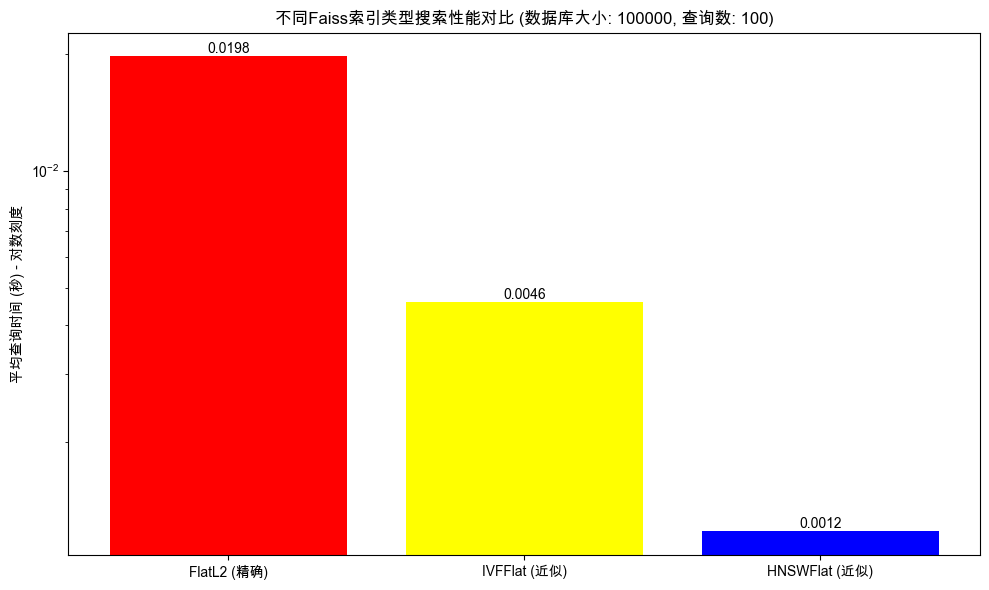


计算近似索引的召回率 R@5...
IndexIVFFlat R@5 召回率: 0.3420
IndexHNSWFlat R@5 召回率: 0.2480


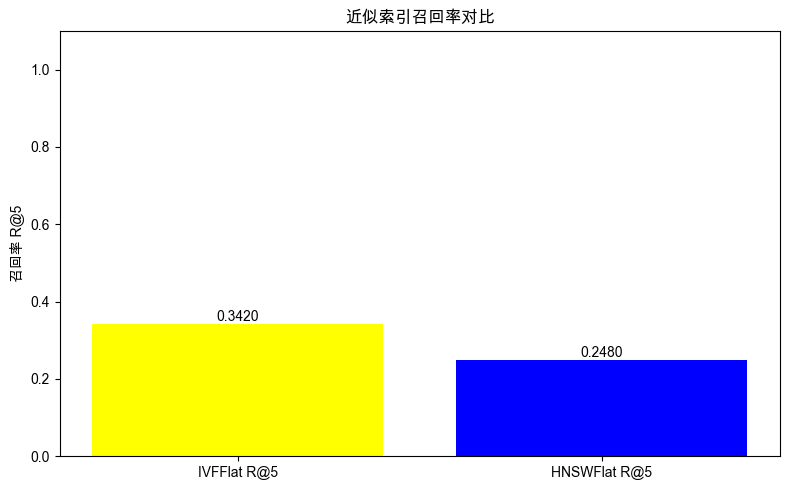

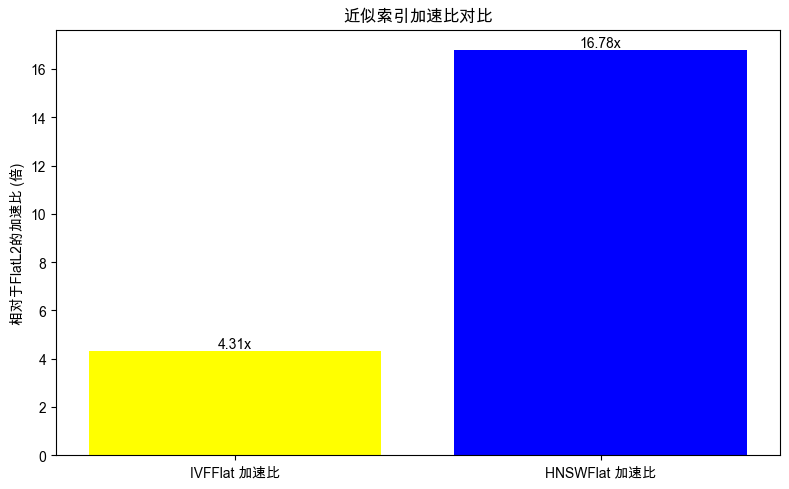

In [5]:
# 不同索引类型的性能对比示例
import numpy as np
import faiss
import time
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 创建示例数据
dimension = 128
nb = 100000  # 数据库向量
nq = 100     # 查询向量

# 创建随机向量
np.random.seed(42)
database_vectors = np.random.random((nb, dimension)).astype('float32')
query_vectors = np.random.random((nq, dimension)).astype('float32')

search_times = []
index_names = []

# 1. 精确搜索 - IndexFlatL2
print("测试 IndexFlatL2...")
index_flat = faiss.IndexFlatL2(dimension)
index_flat.add(database_vectors)
start = time.time()
D_flat, I_flat = index_flat.search(query_vectors, 5)
flat_time = time.time() - start
search_times.append(flat_time)
index_names.append('FlatL2 (精确)')
print(f"IndexFlatL2搜索时间: {flat_time:.4f} 秒")

# 2. IVF索引 - 近似但更快
print("\n测试 IndexIVFFlat...")
nlist = 100  # 聚类数量
quantizer = faiss.IndexFlatL2(dimension)
index_ivf = faiss.IndexIVFFlat(quantizer, dimension, nlist)
print("训练 IVF 索引...")
index_ivf.train(database_vectors)
index_ivf.add(database_vectors)
index_ivf.nprobe = 10  # 搜索时检查多少个聚类
start = time.time()
D_ivf, I_ivf = index_ivf.search(query_vectors, 5)
ivf_time = time.time() - start
search_times.append(ivf_time)
index_names.append('IVFFlat (近似)')
print(f"IndexIVFFlat搜索时间: {ivf_time:.4f} 秒")

# 3. HNSW索引 - 高效且高质量
print("\n测试 IndexHNSWFlat...")
hnsw_time = None
try:
    index_hnsw = faiss.IndexHNSWFlat(dimension, 32) # M=32是常见的HNSW参数
    print("构建 HNSW 索引...")
    index_hnsw.add(database_vectors)
    # HNSW可以设置efSearch参数来平衡速度和精度
    # faiss.ParameterSpace().set_index_parameter(index_hnsw, "efSearch", 16) # 示例：设置搜索参数
    start = time.time()
    D_hnsw, I_hnsw = index_hnsw.search(query_vectors, 5)
    hnsw_time = time.time() - start
    search_times.append(hnsw_time)
    index_names.append('HNSWFlat (近似)')
    print(f"IndexHNSWFlat搜索时间: {hnsw_time:.4f} 秒")

    # 计算加速比
    print(f"\nIVF相对于暴力搜索的加速比: {flat_time/ivf_time:.2f}x")
    if hnsw_time is not None:
        print(f"HNSW相对于暴力搜索的加速比: {flat_time/hnsw_time:.2f}x")

except Exception as e:
    print(f"HNSW索引创建或搜索失败: {e}")
    print(f"\nIVF相对于暴力搜索的加速比: {flat_time/ivf_time:.2f}x")

# --- 可视化部分 ---
print("\n生成性能对比图...")
plt.figure(figsize=(10, 6))
valid_search_times = [t for t, name in zip(search_times, index_names) if t is not None]
valid_index_names_time = [name for t, name in zip(search_times, index_names) if t is not None]

if valid_search_times:
    bars_time = plt.bar(valid_index_names_time, valid_search_times, color=['red', 'yellow', 'blue'][:len(valid_search_times)])
    plt.ylabel('平均查询时间 (秒) - 对数刻度')
    plt.title(f'不同Faiss索引类型搜索性能对比 (数据库大小: {nb}, 查询数: {nq})')
    plt.yscale('log') # 使用对数刻度

    # 在柱状图上显示数值
    for bar in bars_time:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

    plt.tight_layout()
    plt.show()
else:
    print("没有有效的搜索时间数据可供绘制。")

# --- (可选) 召回率计算与可视化 ---
# 注意：计算召回率需要精确结果(I_flat)作为基准
print("\n计算近似索引的召回率 R@5...")
recalls = []
recall_names = []

# 计算IVF召回率
count_ivf = 0
for i in range(nq):
    # 检查IVF找到的5个结果中有多少个也存在于FlatL2找到的前5个结果中
    count_ivf += len(set(I_flat[i]) & set(I_ivf[i]))
ivf_recall = count_ivf / (nq * 5) # R@5
recalls.append(ivf_recall)
recall_names.append('IVFFlat R@5')
print(f"IndexIVFFlat R@5 召回率: {ivf_recall:.4f}")

# 计算HNSW召回率 (如果成功)
if hnsw_time is not None and 'I_hnsw' in locals():
    count_hnsw = 0
    for i in range(nq):
        count_hnsw += len(set(I_flat[i]) & set(I_hnsw[i]))
    hnsw_recall = count_hnsw / (nq * 5) # R@5
    recalls.append(hnsw_recall)
    recall_names.append('HNSWFlat R@5')
    print(f"IndexHNSWFlat R@5 召回率: {hnsw_recall:.4f}")

# 可视化召回率
if recalls:
    plt.figure(figsize=(8, 5))
    valid_recalls = [r for r, name in zip(recalls, recall_names) if r is not None]
    valid_recall_names = [name for r, name in zip(recalls, recall_names) if r is not None]
    
    if valid_recalls:
        colors_recall = ['yellow', 'blue'][:len(valid_recalls)]
        bars_recall = plt.bar(valid_recall_names, valid_recalls, color=colors_recall)
        plt.ylabel('召回率 R@5')
        plt.title('近似索引召回率对比')
        plt.ylim(0, 1.1) # 召回率在0到1之间

        for bar in bars_recall:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

        plt.tight_layout()
        plt.show()
    else:
        print("没有有效的召回率数据可供绘制。")

# 可视化加速比
speedup_ratios = []
speedup_names = []
if ivf_time > 0:
    ivf_speedup = flat_time / ivf_time
    speedup_ratios.append(ivf_speedup)
    speedup_names.append('IVFFlat 加速比')
if hnsw_time is not None and hnsw_time > 0:
    hnsw_speedup = flat_time / hnsw_time
    speedup_ratios.append(hnsw_speedup)
    speedup_names.append('HNSWFlat 加速比')

if speedup_ratios:
    plt.figure(figsize=(8, 5))
    colors_speedup = ['yellow', 'blue'][:len(speedup_ratios)]
    bars_speedup = plt.bar(speedup_names, speedup_ratios, color=colors_speedup)
    plt.ylabel('相对于FlatL2的加速比 (倍)')
    plt.title('近似索引加速比对比')

    for bar in bars_speedup:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}x', va='bottom', ha='center')

    plt.tight_layout()
    plt.show()
else:
    print("没有有效的加速比数据可供绘制。")

## 4. Faiss vs NumPy vs SciPy性能对比

Faiss与传统的NumPy和SciPy相比，在大规模向量搜索上有巨大的性能优势。下面我们通过实验来展示这一点：

Faiss搜索用时: 0.000147 秒/查询
NumPy暴力搜索用时: 0.001787 秒/查询
SciPy暴力搜索用时: 0.000682 秒/查询
Faiss比NumPy快 12.16 倍
Faiss比SciPy快 4.64 倍

结果对比:
Faiss找到的前5个索引: [8769 9385   82 5125 9571]
NumPy找到的前5个索引: [8769 9385   82 5125 9571]
SciPy找到的前5个索引: [8769 9385   82 5125 9571]


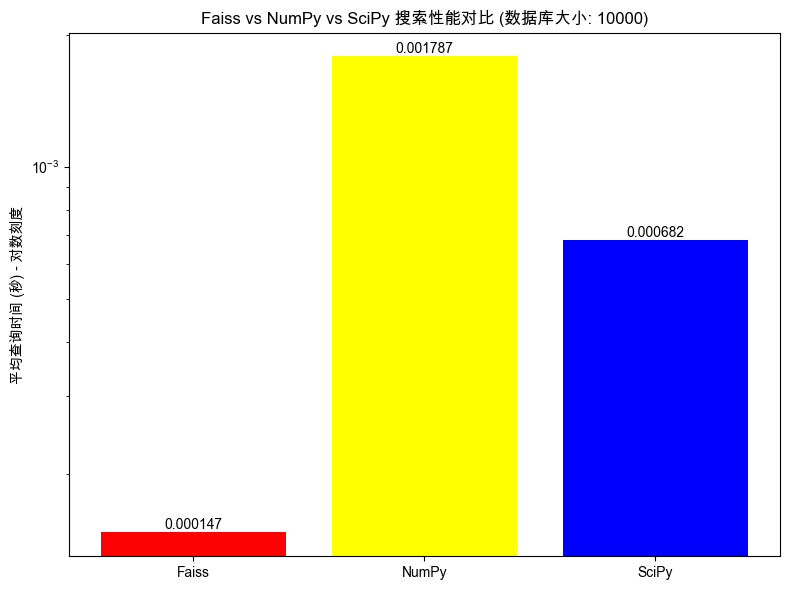

In [9]:
import numpy as np
import faiss
import time
from scipy.spatial import distance
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 创建示例数据
dimension = 128
nb = 10000
np.random.seed(42)
vectors = np.random.random((nb, dimension)).astype('float32')

# 创建索引
index = faiss.IndexFlatL2(dimension)
index.add(vectors)

# 生成查询向量
query = np.random.random((1, dimension)).astype('float32')
k = 5

# 将查询次数增加以获得更准确的计时
num_repeats = 100

# 使用Faiss进行搜索
start_time = time.time()
for _ in range(num_repeats):
    D_faiss, I_faiss = index.search(query, k)
faiss_time = (time.time() - start_time) / num_repeats

# 使用NumPy实现暴力搜索
start_time = time.time()
for _ in range(num_repeats):
    distances = np.linalg.norm(vectors - query, axis=1)
    numpy_indices = np.argsort(distances)[:k]
numpy_time = (time.time() - start_time) / num_repeats

# 使用SciPy实现暴力搜索
start_time = time.time()
for _ in range(num_repeats):
    scipy_distances = distance.cdist(query, vectors, 'euclidean')[0]
    scipy_indices = np.argsort(scipy_distances)[:k]
scipy_time = (time.time() - start_time) / num_repeats

# 性能比较
print(f"Faiss搜索用时: {faiss_time:.6f} 秒/查询")
print(f"NumPy暴力搜索用时: {numpy_time:.6f} 秒/查询")
print(f"SciPy暴力搜索用时: {scipy_time:.6f} 秒/查询")
print(f"Faiss比NumPy快 {numpy_time/faiss_time:.2f} 倍")
print(f"Faiss比SciPy快 {scipy_time/faiss_time:.2f} 倍")

# 验证结果一致性
print("\n结果对比:")
print(f"Faiss找到的前5个索引: {I_faiss[0]}")
print(f"NumPy找到的前5个索引: {numpy_indices}")
print(f"SciPy找到的前5个索引: {scipy_indices}")

# 可视化结果
methods = ['Faiss', 'NumPy', 'SciPy']
times = [faiss_time, numpy_time, scipy_time]

plt.figure(figsize=(8, 6))
bars = plt.bar(methods, times, color=['red', 'yellow', 'blue'])
plt.ylabel('平均查询时间 (秒) - 对数刻度')
plt.title(f'Faiss vs NumPy vs SciPy 搜索性能对比 (数据库大小: {nb})')
plt.yscale('log') # 使用对数刻度，因为时间差异很大

# 在柱状图上显示数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.6f}', va='bottom', ha='center') # 显示数值

plt.tight_layout()
plt.show()

## 5. 保存和加载索引

Faiss索引可以轻松保存和加载，这对于大型模型的部署和重用非常重要：

In [10]:
import numpy as np
import faiss
import os

# 创建并填充索引
dimension = 128
nb = 10000
vectors = np.random.random((nb, dimension)).astype('float32')

index = faiss.IndexFlatL2(dimension)
index.add(vectors)

# 保存索引
index_path = "my_index.bin"
faiss.write_index(index, index_path)
print(f"索引已保存到 {os.path.abspath(index_path)}")

# 加载索引
loaded_index = faiss.read_index(index_path)
print(f"已加载索引，包含 {loaded_index.ntotal} 个向量")

# 验证加载的索引是否与原始索引功能一致
query = np.random.random((1, dimension)).astype('float32')
D1, I1 = index.search(query, 5)
D2, I2 = loaded_index.search(query, 5)

if np.array_equal(I1, I2):
    print("验证成功：加载的索引返回相同结果")
    print(f"原索引结果: {I1}")
    print(f"加载索引结果: {I2}")
else:
    print("验证失败：加载的索引返回与原始索引不同的结果")

索引已保存到 /Users/mini/Desktop/awesome-rag-cookbook/tutorial/faiss/my_index.bin
已加载索引，包含 10000 个向量
验证成功：加载的索引返回相同结果
原索引结果: [[ 298 7667 9798 8115 5502]]
加载索引结果: [[ 298 7667 9798 8115 5502]]


## 6. 带自定义ID和元数据的索引

在实际应用中，我们通常需要将向量与自定义ID或元数据关联起来：

In [11]:
import numpy as np
import faiss
import json

# 创建示例数据
dimension = 64
nb = 1000
vectors = np.random.random((nb, dimension)).astype('float32')

# 创建自定义ID
custom_ids = np.arange(5000, 5000 + nb)

# 创建ID映射索引
base_index = faiss.IndexFlatL2(dimension)
id_map = faiss.IndexIDMap(base_index)
id_map.add_with_ids(vectors, custom_ids)

# 创建元数据
metadata = []
for i in range(nb):
    metadata.append({
        "id": int(custom_ids[i]),
        "title": f"文档 #{i}",
        "category": f"类别 {i % 10}"
    })

# 保存索引和元数据
faiss.write_index(id_map, "id_mapped_index.bin")
with open("metadata.json", 'w', encoding='utf-8') as f:
    json.dump(metadata, f, ensure_ascii=False, indent=2)

print("索引和元数据已保存")

# 加载并使用
loaded_index = faiss.read_index("id_mapped_index.bin")
with open("metadata.json", 'r', encoding='utf-8') as f:
    loaded_metadata = json.load(f)

print(f"已加载索引，包含 {loaded_index.ntotal} 个向量")
print(f"已加载元数据，包含 {len(loaded_metadata)} 条记录")

# 查询
query = np.random.random((1, dimension)).astype('float32')
D, I = loaded_index.search(query, 3)

# 显示结果和元数据
print("\n搜索结果:")
for i, (idx, dist) in enumerate(zip(I[0], D[0])):
    # 查找元数据
    meta_idx = next((i for i, m in enumerate(loaded_metadata) if m["id"] == idx), None)
    if meta_idx is not None:
        print(f"结果 #{i+1}: ID={idx}, 距离={dist:.4f}")
        print(f"  元数据: {json.dumps(loaded_metadata[meta_idx], ensure_ascii=False)}")

索引和元数据已保存
已加载索引，包含 1000 个向量
已加载元数据，包含 1000 条记录

搜索结果:
结果 #1: ID=5073, 距离=5.7997
  元数据: {"id": 5073, "title": "文档 #73", "category": "类别 3"}
结果 #2: ID=5632, 距离=6.2635
  元数据: {"id": 5632, "title": "文档 #632", "category": "类别 2"}
结果 #3: ID=5832, 距离=6.4352
  元数据: {"id": 5832, "title": "文档 #832", "category": "类别 2"}


## 7. 大规模数据处理

Faiss专为大规模数据设计，可以高效处理数百万甚至数十亿向量。以下代码会生成和处理大量数据，运行时间可能会较长，请根据您的计算机性能适当调整 `nb` 参数：

In [12]:
import numpy as np
import faiss
import time

# 模拟大规模数据集 (可以根据计算机性能调整向量数量)
dimension = 256
nb = 100000  # 十万个向量 - 生产环境中可能是百万甚至更多

print(f"创建 {nb} 个 {dimension} 维的向量...")

# 批量生成和添加向量
batch_size = 20000
index = faiss.IndexHNSWFlat(dimension, 32)  # HNSW索引，适合大规模数据

start_time = time.time()

for i in range(0, nb, batch_size):
    end_idx = min(i + batch_size, nb)
    batch_count = end_idx - i
    print(f"生成并添加批次 {i//batch_size + 1}/{(nb-1)//batch_size + 1}，共 {batch_count} 个向量")
    
    # 生成一批向量
    batch_vectors = np.random.random((batch_count, dimension)).astype('float32')
    
    # 添加到索引
    index.add(batch_vectors)

build_time = time.time() - start_time
print(f"索引构建完成，共 {index.ntotal} 个向量，用时 {build_time:.2f} 秒")

# 执行查询测试
nq = 10
query_vectors = np.random.random((nq, dimension)).astype('float32')

start = time.time()
D, I = index.search(query_vectors, 5)
search_time = time.time() - start

print(f"查询 {nq} 个向量用时: {search_time*1000:.2f} 毫秒")
print(f"平均每个查询: {search_time*1000/nq:.2f} 毫秒")

# 显示一些查询结果
print("\n查询结果示例:")
for i in range(2):  # 只显示前两个查询的结果
    print(f"查询向量 {i}:")
    for j in range(3):  # 只显示前三个最近邻
        print(f"  第 {j+1} 近的向量: ID {I[i, j]}, 距离: {D[i, j]:.4f}")

创建 100000 个 256 维的向量...
生成并添加批次 1/5，共 20000 个向量
生成并添加批次 2/5，共 20000 个向量
生成并添加批次 3/5，共 20000 个向量
生成并添加批次 4/5，共 20000 个向量
生成并添加批次 5/5，共 20000 个向量
索引构建完成，共 100000 个向量，用时 17.63 秒
查询 10 个向量用时: 0.63 毫秒
平均每个查询: 0.06 毫秒

查询结果示例:
查询向量 0:
  第 1 近的向量: ID 19458, 距离: 31.5497
  第 2 近的向量: ID 7031, 距离: 31.8965
  第 3 近的向量: ID 19913, 距离: 32.6577
查询向量 1:
  第 1 近的向量: ID 14729, 距离: 29.6790
  第 2 近的向量: ID 27148, 距离: 29.9265
  第 3 近的向量: ID 22268, 距离: 30.4083


## 8. GPU加速

如果您有GPU，Faiss可以利用GPU加速向量搜索：

In [ ]:
# import numpy as np
# import faiss
# import time

# # 检查是否有GPU可用
# try:
#     ngpus = faiss.get_num_gpus()
#     print(f"系统上检测到 {ngpus} 个GPU设备")
#     use_gpu = ngpus > 0
# except Exception as e:
#     print(f"检测GPU时出错: {e}")
#     print("未检测到GPU或Faiss未编译GPU支持")
#     use_gpu = False

# # 创建示例数据
# dimension = 128
# nb = 100000  # 10万向量
# nq = 100     # 100个查询

# print("生成随机向量...")
# database_vectors = np.random.random((nb, dimension)).astype('float32')
# query_vectors = np.random.random((nq, dimension)).astype('float32')

# # 创建CPU索引作为基准
# cpu_index = faiss.IndexFlatL2(dimension)
# cpu_index.add(database_vectors)

# # 测量CPU搜索时间
# print("在CPU上执行搜索...")
# start = time.time()
# D_cpu, I_cpu = cpu_index.search(query_vectors, 10)
# end = time.time()
# cpu_time = end - start
# print(f"CPU搜索时间: {cpu_time:.4f} 秒")

# # 如果有GPU，则测试GPU版本
# if use_gpu:
#     try:
#         print("复制索引到GPU...")
#         gpu_index = faiss.index_cpu_to_gpu(faiss.StandardGpuResources(), 0, cpu_index)
        
#         # 测量GPU搜索时间
#         print("在GPU上执行搜索...")
#         start = time.time()
#         D_gpu, I_gpu = gpu_index.search(query_vectors, 10)
#         end = time.time()
#         gpu_time = end - start
#         print(f"GPU搜索时间: {gpu_time:.4f} 秒")
#         print(f"加速比: {cpu_time / gpu_time:.2f}x")
#     except Exception as e:
#         print(f"GPU搜索出错: {e}")
# else:
#     print("未使用GPU加速 - 需要GPU硬件和faiss-gpu包")

## 9. 总结

Faiss是一个强大的向量搜索库，提供了以下主要优势：

1. **卓越的性能**：比传统的NumPy或SciPy方法快数十到数千倍
2. **多样化的索引选项**：从精确搜索到近似搜索，适应不同的性能和准确度需求
3. **内存效率**：通过各种索引结构优化内存使用
4. **可扩展性**：能够处理从小型数据集到数十亿向量的场景
5. **GPU加速**：可以利用GPU进一步提升性能

无论是在相似图片搜索、推荐系统、语义文本搜索还是任何需要高效相似度计算的应用中，Faiss都是一个值得考虑的强大工具。

## 参考资源

- [Faiss GitHub仓库](https://github.com/facebookresearch/faiss)
- [Faiss官方Wiki](https://github.com/facebookresearch/faiss/wiki)
- [Faiss Python API文档](https://faiss.ai/)

## 10. 深入理解Faiss中的train方法

在Faiss中，`train`方法是一些索引类型必不可少的预处理步骤。下面我们详细解释train方法的作用和使用场景：

### 10.1 为什么需要train方法？

- **数据分布学习**：某些索引类型需要先了解数据的分布特征，才能高效地组织和搜索向量
- **聚类和量化**：例如IVF索引需要学习聚类中心，PQ索引需要学习量化编码本
- **性能优化**：train过程帮助索引结构适应特定数据集的特点，提高后续搜索的速度和准确度

### 10.2 哪些索引类型需要训练？

| 索引类型 | 是否需要训练 | 训练目的 |
|---------|------------|---------|
| IndexFlatL2 | 否 | 暴力搜索，不需训练 |
| IndexHNSWFlat | 否 | 构建图结构，在add时完成 |
| IndexIVFFlat | 是 | 学习聚类中心 |
| IndexPQ | 是 | 学习乘积量化编码本 |
| IndexIVFPQ | 是 | 学习聚类中心和量化编码本 |
| IndexScalarQuantizer | 是 | 学习标量量化参数 |

===== 理解train方法的重要性 =====

尝试在未训练的情况下添加向量...
错误: Error in virtual void __cdecl faiss::IndexIVFFlat::add_core(idx_t, const float *, const idx_t *, const idx_t *, void *) at D:\a\faiss-wheels\faiss-wheels\faiss\faiss\IndexIVFFlat.cpp:52: Error: 'is_trained' failed

执行训练过程...
训练用时: 0.0948秒
索引是否已训练: True

添加向量到已训练的索引...
索引中的向量数量: 50000

调整nprobe参数以平衡速度和准确度...
nprobe= 1: 搜索时间=0.00115秒, 召回率=0.0200
nprobe= 5: 搜索时间=0.00000秒, 召回率=0.2200
nprobe=10: 搜索时间=0.00000秒, 召回率=0.3200
nprobe=20: 搜索时间=0.00231秒, 召回率=0.5000
nprobe=50: 搜索时间=0.00751秒, 召回率=0.8000


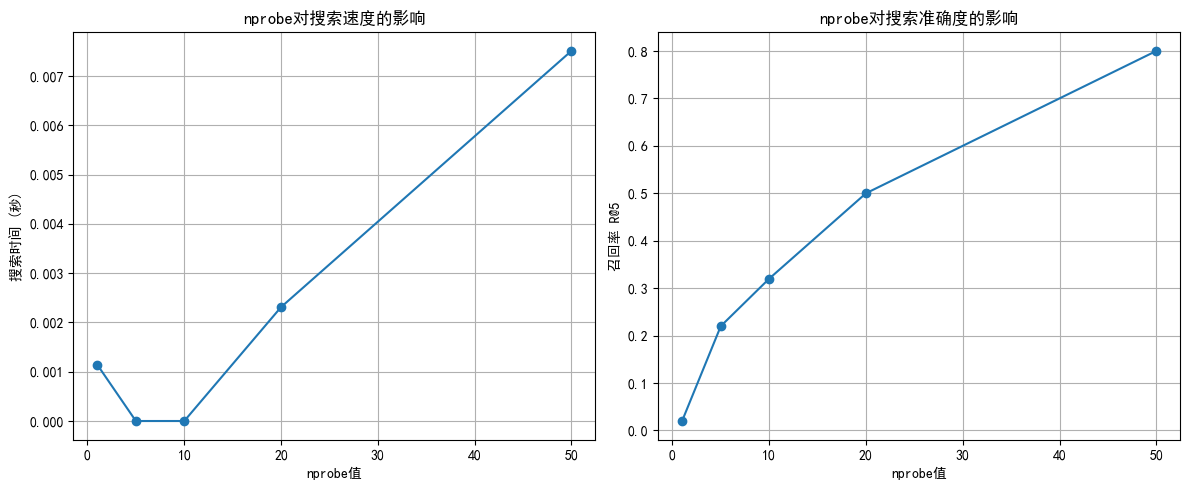


===== 训练数据大小的影响 =====

训练集大小=500: 训练时间=0.0420秒, 召回率=0.4800
训练集大小=1000: 训练时间=0.0086秒, 召回率=0.6600
训练集大小=5000: 训练时间=0.0340秒, 召回率=0.4000
训练集大小=10000: 训练时间=0.0519秒, 召回率=0.5200
训练集大小=20000: 训练时间=0.0839秒, 召回率=0.3400
训练集大小=20000: 训练时间=0.0839秒, 召回率=0.3400


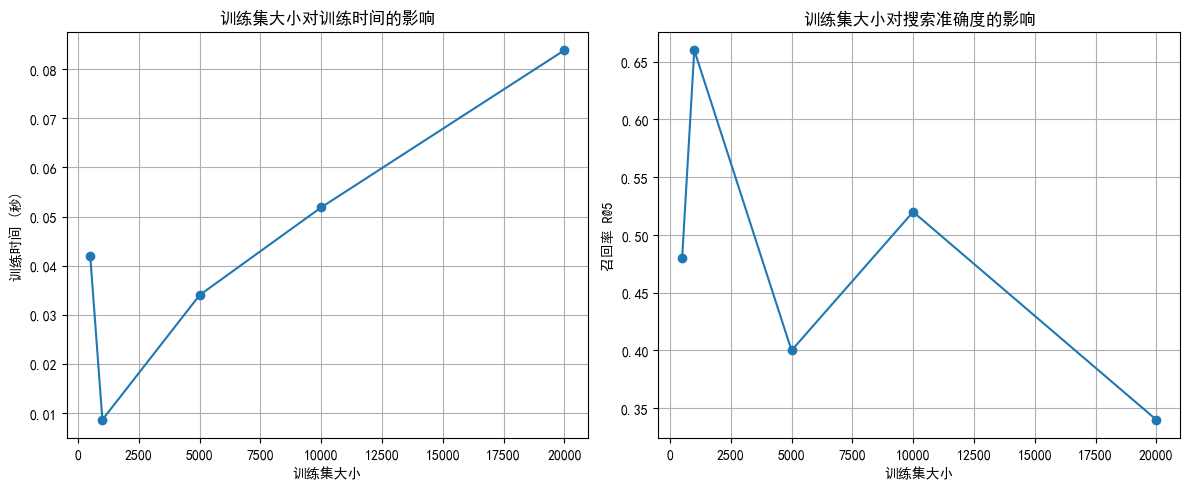


===== 不同索引类型的train方法 =====

创建并训练不同类型的索引...

IVFPQ索引:
  训练用时: 0.5215秒
  IVFPQ索引训练涉及:
  - 学习 100 个聚类中心
  - 学习 8 个子空间的PQ编码本，每个有 2^8=256 个中心点

IVFFlat索引:
  训练用时: 0.1120秒
  IVFFlat索引训练涉及:
  - 仅学习 100 个聚类中心

不需要训练的索引类型:
  - IndexFlatL2: 暴力搜索，无需训练
  - IndexHNSWFlat: 在添加向量时动态构建图结构，不需要预先训练
  训练用时: 0.5215秒
  IVFPQ索引训练涉及:
  - 学习 100 个聚类中心
  - 学习 8 个子空间的PQ编码本，每个有 2^8=256 个中心点

IVFFlat索引:
  训练用时: 0.1120秒
  IVFFlat索引训练涉及:
  - 仅学习 100 个聚类中心

不需要训练的索引类型:
  - IndexFlatL2: 暴力搜索，无需训练
  - IndexHNSWFlat: 在添加向量时动态构建图结构，不需要预先训练


In [ ]:
import numpy as np
import faiss
import time
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 创建示例数据
dimension = 64     # 向量维度
nb = 50000         # 数据库向量数量
nq = 10            # 查询向量数量

# 生成随机向量
np.random.seed(42)
db_vectors = np.random.random((nb, dimension)).astype('float32')
query_vectors = np.random.random((nq, dimension)).astype('float32')

# 创建需要训练的IVF索引
nlist = 100  # 聚类中心数量
quantizer = faiss.IndexFlatL2(dimension)  # 用于聚类中心的索引类型
index_ivf = faiss.IndexIVFFlat(quantizer, dimension, nlist, faiss.METRIC_L2)

print("===== 理解train方法的重要性 =====\n")

# 1. 展示未训练就添加向量的错误
try:
    print("尝试在未训练的情况下添加向量...")
    index_ivf.add(db_vectors[:10])
except RuntimeError as e:
    print(f"错误: {e}\n")

# 2. 正确的训练和添加流程
print("执行训练过程...")
start_time = time.time()
index_ivf.train(db_vectors)
train_time = time.time() - start_time
print(f"训练用时: {train_time:.4f}秒")

# 检查训练状态
print(f"索引是否已训练: {index_ivf.is_trained}")

# 3. 添加向量并搜索
print("\n添加向量到已训练的索引...")
index_ivf.add(db_vectors)
print(f"索引中的向量数量: {index_ivf.ntotal}")

# 4. 设置nprobe参数并搜索
print("\n调整nprobe参数以平衡速度和准确度...")
probes = [1, 5, 10, 20, 50]
times = []
recalls = []

# 获取精确结果作为基准
index_flat = faiss.IndexFlatL2(dimension)
index_flat.add(db_vectors)
_, I_flat = index_flat.search(query_vectors, 5)  # 精确的前5个最近邻

for nprobe in probes:
    index_ivf.nprobe = nprobe  # 搜索时查看的聚类数量
    
    # 测量搜索时间
    start = time.time()
    D_ivf, I_ivf = index_ivf.search(query_vectors, 5)
    search_time = time.time() - start
    times.append(search_time)
    
    # 计算召回率
    recall = 0
    for i in range(nq):
        recall += len(set(I_flat[i]) & set(I_ivf[i])) / 5
    recall /= nq
    recalls.append(recall)
    
    print(f"nprobe={nprobe:2d}: 搜索时间={search_time:.5f}秒, 召回率={recall:.4f}")

# 可视化nprobe参数的影响
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(probes, times, 'o-')
ax1.set_xlabel('nprobe值')
ax1.set_ylabel('搜索时间 (秒)')
ax1.set_title('nprobe对搜索速度的影响')
ax1.grid(True)

ax2.plot(probes, recalls, 'o-')
ax2.set_xlabel('nprobe值')
ax2.set_ylabel('召回率 R@5')
ax2.set_title('nprobe对搜索准确度的影响')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\n===== 训练数据大小的影响 =====\n")

# 5. 研究训练数据大小的影响
train_sizes = [500, 1000, 5000, 10000, 20000]
train_times = []
train_recalls = []

for size in train_sizes:
    # 创建新索引
    test_index = faiss.IndexIVFFlat(faiss.IndexFlatL2(dimension), dimension, nlist)
    
    # 训练
    start = time.time()
    test_index.train(db_vectors[:size])  # 使用不同大小的训练集
    train_time = time.time() - start
    train_times.append(train_time)
    
    # 添加所有向量
    test_index.add(db_vectors)
    
    # 搜索
    test_index.nprobe = 10
    _, I_test = test_index.search(query_vectors, 5)
    
    # 计算召回率
    recall = 0
    for i in range(nq):
        recall += len(set(I_flat[i]) & set(I_test[i])) / 5
    recall /= nq
    train_recalls.append(recall)
    
    print(f"训练集大小={size}: 训练时间={train_time:.4f}秒, 召回率={recall:.4f}")

# 可视化训练集大小的影响
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_sizes, train_times, 'o-')
ax1.set_xlabel('训练集大小')
ax1.set_ylabel('训练时间 (秒)')
ax1.set_title('训练集大小对训练时间的影响')
ax1.grid(True)

ax2.plot(train_sizes, train_recalls, 'o-')
ax2.set_xlabel('训练集大小')
ax2.set_ylabel('召回率 R@5')
ax2.set_title('训练集大小对搜索准确度的影响')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\n===== 不同索引类型的train方法 =====\n")

# 6. 对比不同索引类型的训练
print("创建并训练不同类型的索引...")

# IVFPQ索引 (向量压缩 + 聚类)
try:
    print("\nIVFPQ索引:")
    m = 8  # 子量化器数量
    bits = 8  # 每个子量化器的位数
    index_ivfpq = faiss.IndexIVFPQ(faiss.IndexFlatL2(dimension), dimension, nlist, m, bits)
    
    start = time.time()
    index_ivfpq.train(db_vectors[:20000])
    ivfpq_time = time.time() - start
    
    print(f"  训练用时: {ivfpq_time:.4f}秒")
    print(f"  IVFPQ索引训练涉及:")
    print(f"  - 学习 {nlist} 个聚类中心")
    print(f"  - 学习 {m} 个子空间的PQ编码本，每个有 2^{bits}={2**bits} 个中心点")
except Exception as e:
    print(f"  IVFPQ索引训练错误: {e}")

# IVFFlat索引 (仅聚类)
print("\nIVFFlat索引:")
index_ivf_simple = faiss.IndexIVFFlat(faiss.IndexFlatL2(dimension), dimension, nlist)
start = time.time()
index_ivf_simple.train(db_vectors[:20000])
ivf_time = time.time() - start
print(f"  训练用时: {ivf_time:.4f}秒")
print(f"  IVFFlat索引训练涉及:")
print(f"  - 仅学习 {nlist} 个聚类中心")

# 不需要训练的索引类型
print("\n不需要训练的索引类型:")
print("  - IndexFlatL2: 暴力搜索，无需训练")
print("  - IndexHNSWFlat: 在添加向量时动态构建图结构，不需要预先训练")

### 10.3 关于train方法的重要注意事项

1. **训练顺序**：必须先训练(train)，再添加(add)向量
2. **训练数据**：
   - 可以使用数据集的一个代表性子集进行训练
   - 通常10,000-100,000个向量就足够训练出良好的索引结构
   - 训练数据应该具有与完整数据集相似的分布
3. **train vs add**：
   - `train()`: 学习数据分布，构建索引结构
   - `add()`: 将向量添加到已训练好的索引结构中
4. **重复训练**：
   - 索引一旦训练，就不应该再次训练
   - 如需修改训练参数，应创建新的索引实例并重新训练
5. **训练成本**：
   - 训练是一次性成本，训练后可以多次添加/删除向量
   - 对于大型索引，训练可能需要较长时间，但搜索会更快

在Faiss使用过程中正确理解和应用train方法，对于构建高效的向量检索系统至关重要。